In [1]:
import pandas as pd
commodity = 'corn'
import utils
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import dataloader_cm
import LSTM

In [4]:
train_loader = dataloader_cm.get_dataloader('corn', 20, 'train', 10)
validation_loader = dataloader_cm.get_dataloader('corn', 20, 'val', 100)

In [5]:
model = LSTM.CommodityLSTM(validation_loader)

In [6]:
training_losses, validation_losses = model.train(train_loader, validation_loader)

TRAINING BATCH LOSS AT STEP 0: 0.21180841326713562
VALIDATION BATCH LOSS AT STEP 0: 0.21071310341358185
TRAINING BATCH LOSS AT STEP 50: 0.10381527245044708
VALIDATION BATCH LOSS AT STEP 50: 0.10101985931396484
TRAINING BATCH LOSS AT STEP 100: 0.022455114871263504
VALIDATION BATCH LOSS AT STEP 100: 0.02125346101820469
TRAINING BATCH LOSS AT STEP 150: 0.00037488352973014116
VALIDATION BATCH LOSS AT STEP 150: 0.0003524895873852074
TRAINING BATCH LOSS AT STEP 200: 0.00014029843441676348
VALIDATION BATCH LOSS AT STEP 200: 0.00015036806871648878
TRAINING BATCH LOSS AT STEP 250: 4.277821790310554e-05
VALIDATION BATCH LOSS AT STEP 250: 0.00014717959857080132
TRAINING BATCH LOSS AT STEP 300: 2.8658299925155006e-05
VALIDATION BATCH LOSS AT STEP 300: 0.00014688711962662637
TRAINING BATCH LOSS AT STEP 350: 4.13537782151252e-05
VALIDATION BATCH LOSS AT STEP 350: 0.00014685721544083208
TRAINING BATCH LOSS AT STEP 400: 3.330101753817871e-05
VALIDATION BATCH LOSS AT STEP 400: 0.00014914201165083796
TR

In [13]:
training_losses = torch.stack(training_losses).detach().numpy()
validation_losses = torch.stack(validation_losses).detach().numpy()

TypeError: stack(): argument 'tensors' (position 1) must be tuple of Tensors, not numpy.ndarray

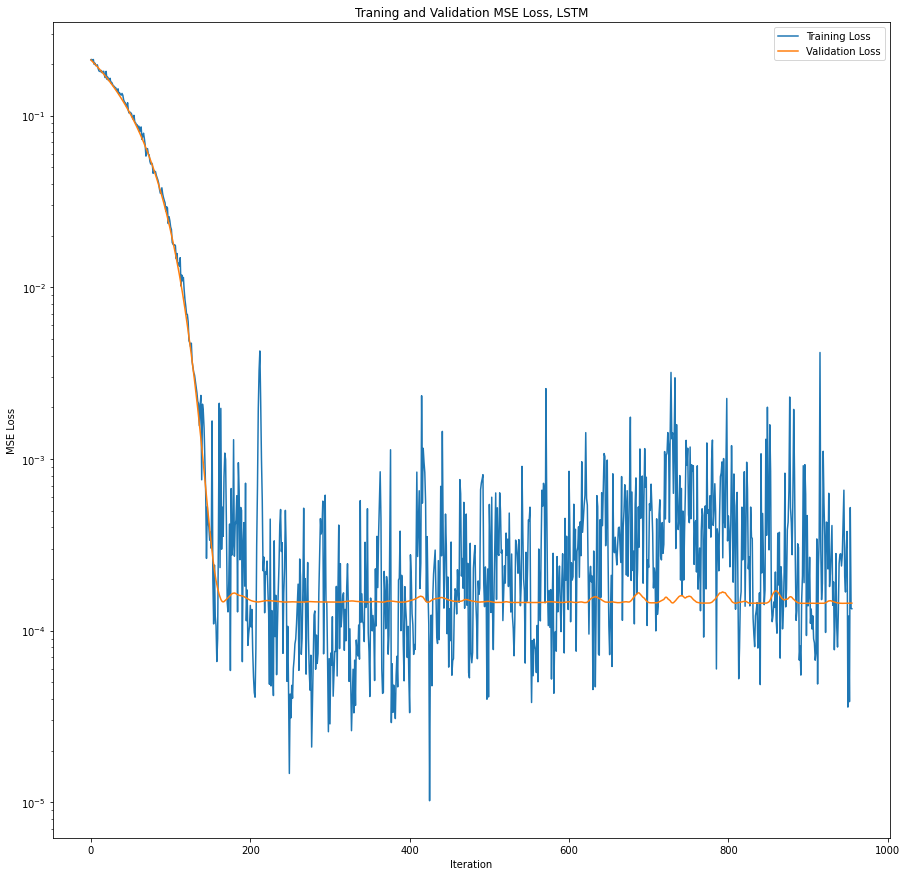

In [14]:
plt.figure(figsize = (15,15))
plt.title('Traning and Validation MSE Loss, LSTM')
plt.plot(training_losses, label= 'Training Loss')
plt.plot(validation_losses, label = 'Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('MSE Loss')
plt.yscale('log')
plt.legend()

In [124]:
from torch.utils.data import dataset, dataloader, SequentialSampler
dataset = dataloader_cm.CommoditiesDataSet('corn', 20, 'val')
validation_loader_2 = dataloader.DataLoader(
            dataset=dataset,
            batch_size=1,
            sampler=SequentialSampler(dataset),
            num_workers=2,
            pin_memory=torch.cuda.is_available(),
            drop_last=True,
)

In [176]:
predictions, val_losses, actuals = model.test(validation_loader_2)

/Users/bodhinguyen/.pyenv/versions/3.8.5/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 0])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Long only annualized psuedo sharpe:  0.3994782204501277
Strategy annualized psuedo sharpe:  1.0797243054167198
Correlation matrix between long only and strategy returns
[[1.         0.24260572]
 [0.24260572 1.        ]]


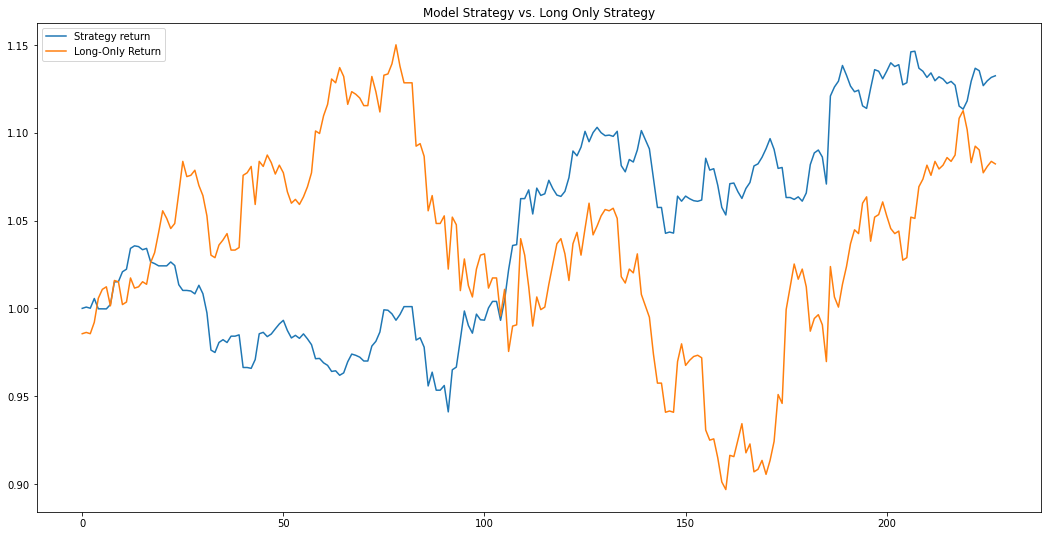

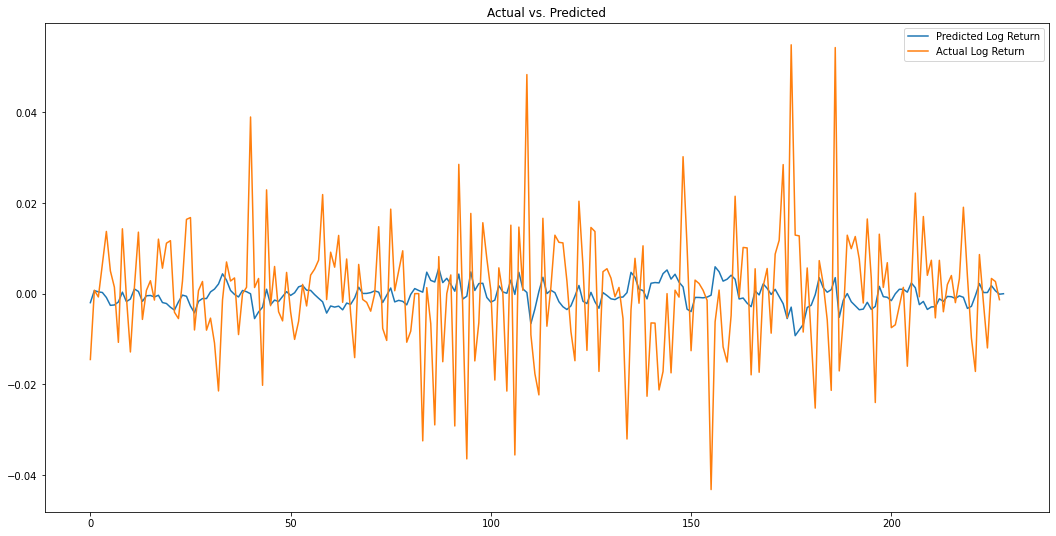

In [195]:
from backtester import *
backtest_log(predictions, actuals)

# LSTM with Additional Variable